### デバックようのコード

In [2]:
from voc import make_filepath_list

rootpath = './data/VOCdevkit/VOC2012/'

# tr_img, tr_anno, val_img, val_anno = list(), list(), list(), list()
tr_img, tr_anno, val_img, val_anno = make_filepath_list(rootpath)

print(tr_img[0])
print(tr_anno[0])
print(val_img[0])
print(val_anno[0])


./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


In [3]:
# p74
import cv2
from voc import GetBBoxAndLabel

voc_labels = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train',
    'tvmonitor'
]


annotation = GetBBoxAndLabel(voc_labels)

index = 1
img_path = val_img[index]
print('img_path', img_path, sep='\n')
img = cv2.imread(img_path)

# print(img, type(img))
height, width, _ = img.shape

annotation(val_anno[index],
           width,
           height
)
# p74

img_path
./data/VOCdevkit/VOC2012/JPEGImages/2008_000003.jpg


array([[ 0.09      ,  0.03003003,  0.998     ,  0.996997  , 18.        ],
       [ 0.122     ,  0.56756757,  0.164     ,  0.72672673, 14.        ]])

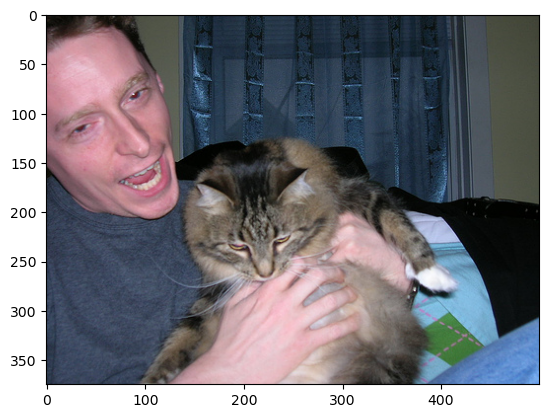

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


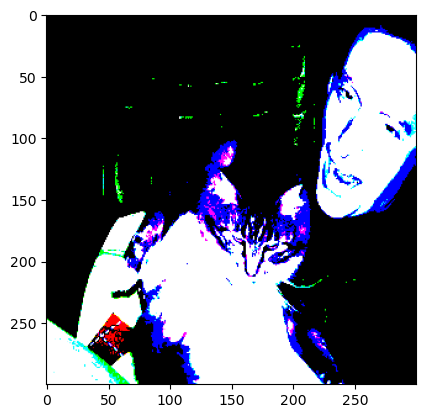

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


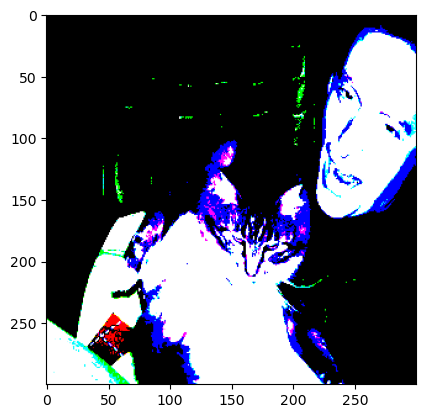

In [33]:
#p10２
import cv2
from voc import DataTransform
import matplotlib.pyplot as plt
%matplotlib inline

img_filepath = tr_img[19]
img = cv2.imread(img_filepath)
heihgt, width, _ = img.shape

gbl = GetBBoxAndLabel(voc_labels)

bbox_label = gbl(tr_anno[19], width, height)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


color_mean = (104, 117, 123)
input_size = 300

transform = DataTransform(input_size, color_mean)

phase = 'train'

img_tranformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_tranformed, cv2.COLOR_BGR2RGB))
plt.show()


phase = 'val'

img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_tranformed, cv2.COLOR_BGR2RGB))
plt.show()
